In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "DENSE_NEURAL_NETWORK_CHANGE_THIS"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'), ('optimal_v2', 'close')],
                            param_spec={},
                            optimal_threshold={'buy':0.8},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [3,5,10,30]}
                                    ],

                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi
dataset

Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from chunk 11...


,time,high,low,close,open,volume,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
90,1502947979999,4320.00,4320.00,4319.996912,4320.00,0.048053,57.115207,0.0,0.000000,0.000000,...,0.000009,0.002595,0.000000e+00,0.000000e+00,-5.614929e-02,-0.056643,0.000000e+00,0.000000e+00,-9.821228e-04,-0.000991
91,1502948039999,4320.00,4320.00,4319.998456,4320.00,0.030719,57.115207,0.0,0.000000,0.000000,...,0.000005,0.002594,0.000000e+00,0.000000e+00,-5.614929e-02,-0.056643,0.000000e+00,0.000000e+00,-9.821228e-04,-0.000991
92,1502948099999,4320.00,4320.00,4319.999228,4320.00,0.179059,57.115207,0.0,0.000000,0.000000,...,0.000002,0.003119,0.000000e+00,1.421085e-14,-5.614929e-02,1.267925,0.000000e+00,2.488104e-16,-9.821228e-04,0.022703
93,1502948159999,4320.00,4320.00,4319.999614,4320.00,0.501599,57.115207,0.0,0.000000,0.000000,...,0.000091,0.000549,0.000000e+00,0.000000e+00,1.805912e-01,-3.710458,0.000000e+00,0.000000e+00,3.171906e-03,-0.061002
94,1502948219999,4320.00,4320.00,4319.999807,4320.00,0.019386,57.115207,0.0,0.000000,0.000000,...,0.000046,-0.000731,1.421085e-14,0.000000e+00,2.131628e-14,-3.710458,2.488104e-16,0.000000e+00,3.732155e-16,-0.061002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,1606715999999,18524.07,18515.78,18519.207620,18516.15,5.437391,48.835637,0.0,-47.870913,-55.952377,...,-0.001750,-0.004243,-7.571145e-02,1.660547e-01,-2.295415e+00,-8.582903,-1.547932e-03,3.411878e-03,-4.489279e-02,-0.149480
1722409,1606719659999,18559.77,18512.90,18523.983810,18520.27,65.068932,49.549404,0.0,-76.352017,-76.352017,...,-0.001495,-0.004131,1.071276e+00,2.149465e-01,-1.718577e+00,-7.239547,2.209813e-02,4.356924e-03,-3.352146e-02,-0.127482
1722410,1606719719999,18530.08,18523.66,18525.301905,18528.89,15.367476,49.368604,0.0,-73.539780,-73.539780,...,-0.000786,-0.003734,9.388564e-01,4.572552e-01,-1.291359e-02,-6.066955,1.938594e-02,9.348652e-03,-2.615065e-04,-0.109442
1722411,1606719779999,18530.08,18520.47,18526.950952,18526.62,54.298657,49.541841,0.0,-70.021437,-70.021437,...,-0.000390,-0.003805,7.062039e-01,1.063714e+00,1.244301e-01,-6.750530,1.446083e-02,2.194214e-02,2.517941e-03,-0.119919


In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,RSI,optimal,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
90,4319.996912,57.115207,0.0,0.000000,0.000000,-0.395889,-35.656636,80.000000,74.712644,45.575289,...,0.000009,0.002595,0.000000e+00,0.000000e+00,-5.614929e-02,-0.056643,0.000000e+00,0.000000e+00,-9.821228e-04,-0.000991
91,4319.998456,57.115207,0.0,0.000000,0.000000,-0.197944,-35.650303,80.000000,74.712644,45.445380,...,0.000005,0.002594,0.000000e+00,0.000000e+00,-5.614929e-02,-0.056643,0.000000e+00,0.000000e+00,-9.821228e-04,-0.000991
92,4319.999228,57.115207,0.0,0.000000,0.000000,-0.098972,-35.647137,80.000000,74.712644,45.380536,...,0.000002,0.003119,0.000000e+00,1.421085e-14,-5.614929e-02,1.267925,0.000000e+00,2.488104e-16,-9.821228e-04,0.022703
93,4319.999614,57.115207,0.0,0.000000,0.000000,0.000000,-35.645554,80.000000,74.712644,57.319074,...,0.000091,0.000549,0.000000e+00,0.000000e+00,1.805912e-01,-3.710458,0.000000e+00,0.000000e+00,3.171906e-03,-0.061002
94,4319.999807,57.115207,0.0,0.000000,0.000000,0.000000,-35.644762,80.000001,74.712644,57.319074,...,0.000046,-0.000731,1.421085e-14,0.000000e+00,2.131628e-14,-3.710458,2.488104e-16,0.000000e+00,3.732155e-16,-0.061002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722408,18519.207620,48.835637,0.0,-47.870913,-55.952377,-85.207271,-94.485865,72.771799,-35.964805,-72.866771,...,-0.001750,-0.004243,-7.571145e-02,1.660547e-01,-2.295415e+00,-8.582903,-1.547932e-03,3.411878e-03,-4.489279e-02,-0.149480
1722409,18523.983810,49.549404,0.0,-76.352017,-76.352017,-76.352017,-89.065986,100.000000,166.666667,66.422349,...,-0.001495,-0.004131,1.071276e+00,2.149465e-01,-1.718577e+00,-7.239547,2.209813e-02,4.356924e-03,-3.352146e-02,-0.127482
1722410,18525.301905,49.368604,0.0,-73.539780,-73.539780,-73.539780,-87.765705,4.120113,43.185205,19.741716,...,-0.000786,-0.003734,9.388564e-01,4.572552e-01,-1.291359e-02,-6.066955,1.938594e-02,9.348652e-03,-2.615065e-04,-0.109442
1722411,18526.950952,49.541841,0.0,-70.021437,-70.021437,-70.021437,-86.138944,-56.287076,20.497531,25.265058,...,-0.000390,-0.003805,7.062039e-01,1.063714e+00,1.244301e-01,-6.750530,1.446083e-02,2.194214e-02,2.517941e-03,-0.119919


In [5]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,RSI,WILLR_close_period_3,WILLR_close_period_5,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_3,CCI_close_period_5,CCI_close_period_10,CCI_close_period_30,...,RateOfChange_close_period_10,RateOfChange_close_period_30,Momentum_RSI_period_3,Momentum_RSI_period_5,Momentum_RSI_period_10,Momentum_RSI_period_30,RateOfChange_RSI_period_3,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_30
0,3615.816381,44.989994,-52.346848,-52.346848,-43.733872,-59.411161,100.000000,93.332619,29.603789,-31.033195,...,0.001086,-0.001747,1.991011,0.543937,5.653247,-0.863212,0.046304,0.012238,0.143714,-0.018826
1,4326.517763,53.923577,-5.407792,-5.367752,-5.367752,-5.367752,100.000000,114.503174,139.571339,115.523158,...,0.006544,0.012026,1.589413,1.681828,6.452575,6.552722,0.030370,0.032193,0.135927,0.138328
2,7190.440791,48.173377,-39.645546,-31.904989,-31.904989,-71.721633,100.000000,122.766944,163.071758,-7.519189,...,0.000099,0.000631,1.392121,1.921500,0.567682,1.394742,0.029758,0.041544,0.011925,0.029816
3,11324.000800,38.799972,-19.980461,-15.958857,-11.110123,-58.670111,65.176741,93.341056,133.030329,-39.690284,...,0.000751,-0.004786,2.787358,3.429540,6.542879,5.549292,0.077399,0.096961,0.202835,0.166893
4,12455.682711,59.820767,-31.655206,-31.655206,-31.655206,-42.951574,100.000000,135.389850,184.042200,46.033067,...,0.001452,-0.000891,1.139939,0.659489,-0.191603,-9.958278,0.019426,0.011147,-0.003193,-0.142712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228650,7306.193311,48.971718,-35.102020,-35.467937,-67.172073,-61.559082,72.690713,-39.490982,-97.138996,-89.343847,...,-0.002351,-0.004244,-1.216354,-1.225097,-1.305596,-6.276465,-0.024236,-0.024406,-0.025968,-0.113605
228651,8343.219240,40.903961,-39.806098,-39.208409,-32.795388,-79.373338,81.740050,44.567750,71.935183,-62.468413,...,0.000676,-0.015277,2.645250,1.223534,5.524791,-4.837646,0.069141,0.030835,0.156159,-0.105760
228652,6442.529751,45.643928,-35.289272,-13.461839,-51.687127,-71.143752,24.061256,55.078822,-18.284491,-102.899093,...,-0.002124,-0.004397,0.043945,2.738082,-0.156229,-3.665224,0.000964,0.063816,-0.003411,-0.074332
228653,11328.056365,48.637182,-75.481535,-36.182416,-26.304809,-43.864816,-100.000000,34.731483,33.642027,14.205635,...,-0.000094,-0.002952,0.101134,1.065233,0.285339,-1.165228,0.002084,0.022392,0.005901,-0.023397


In [6]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [18]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

#callbacks



model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, epochs=40, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/40
7146/7146 [==============================] - 20s 3ms/step - loss: 0.4450 - accuracy: 0.7293 - val_loss: 0.5219 - val_accuracy: 0.6490
Epoch 2/40
7146/7146 [==============================] - 19s 3ms/step - loss: 0.4144 - accuracy: 0.7431 - val_loss: 0.4504 - val_accuracy: 0.6949
Epoch 3/40
7146/7146 [==============================] - 20s 3ms/step - loss: 0.4084 - accuracy: 0.7470 - val_loss: 0.4889 - val_accuracy: 0.6936
Epoch 4/40
7146/7146 [==============================] - 21s 3ms/step - loss: 0.4048 - accuracy: 0.7503 - val_loss: 0.4986 - val_accuracy: 0.6854
Epoch 5/40
7146/7146 [==============================] - 22s 3ms/step - loss: 0.4027 - accuracy: 0.7495 - val_loss: 0.4634 - val_accuracy: 0.6937
Epoch 6/40
1382/7146 [====>.........................] - ETA: 12s - loss: 0.4015 - accuracy: 0.7505

KeyboardInterrupt: 

In [23]:
reduced_classified_data = nu.classifyPoints(model, testX, predict_proba=False, proba_thresh=0.8, plot_optimal=True, optimal=testy, is_nn=True)

In [26]:
smaller_view_data = reduced_classified_data[4000:6000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

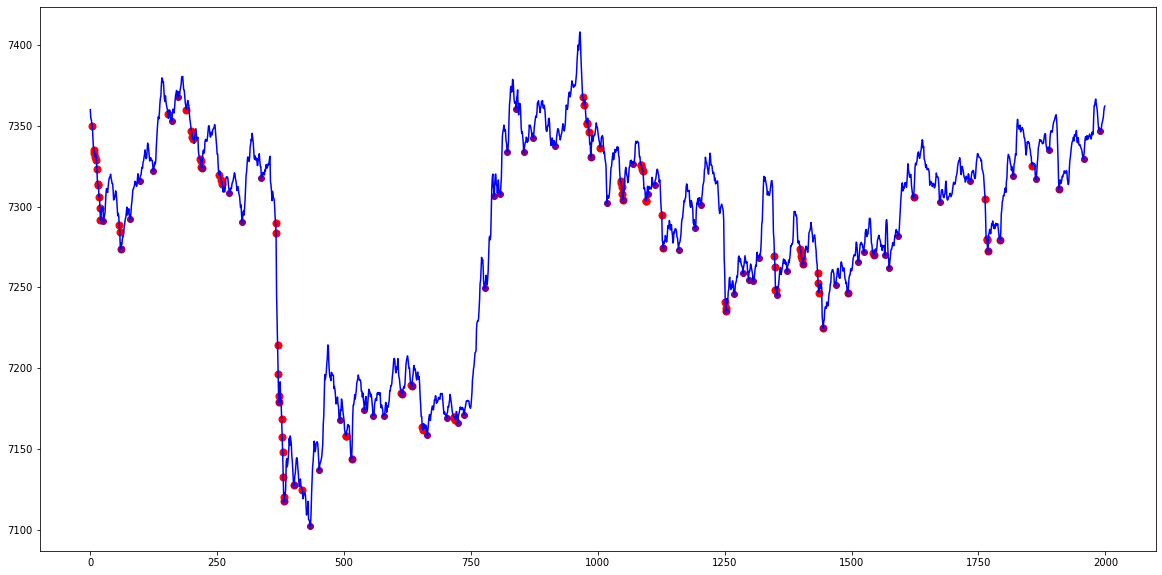

In [27]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)